# Problem 1

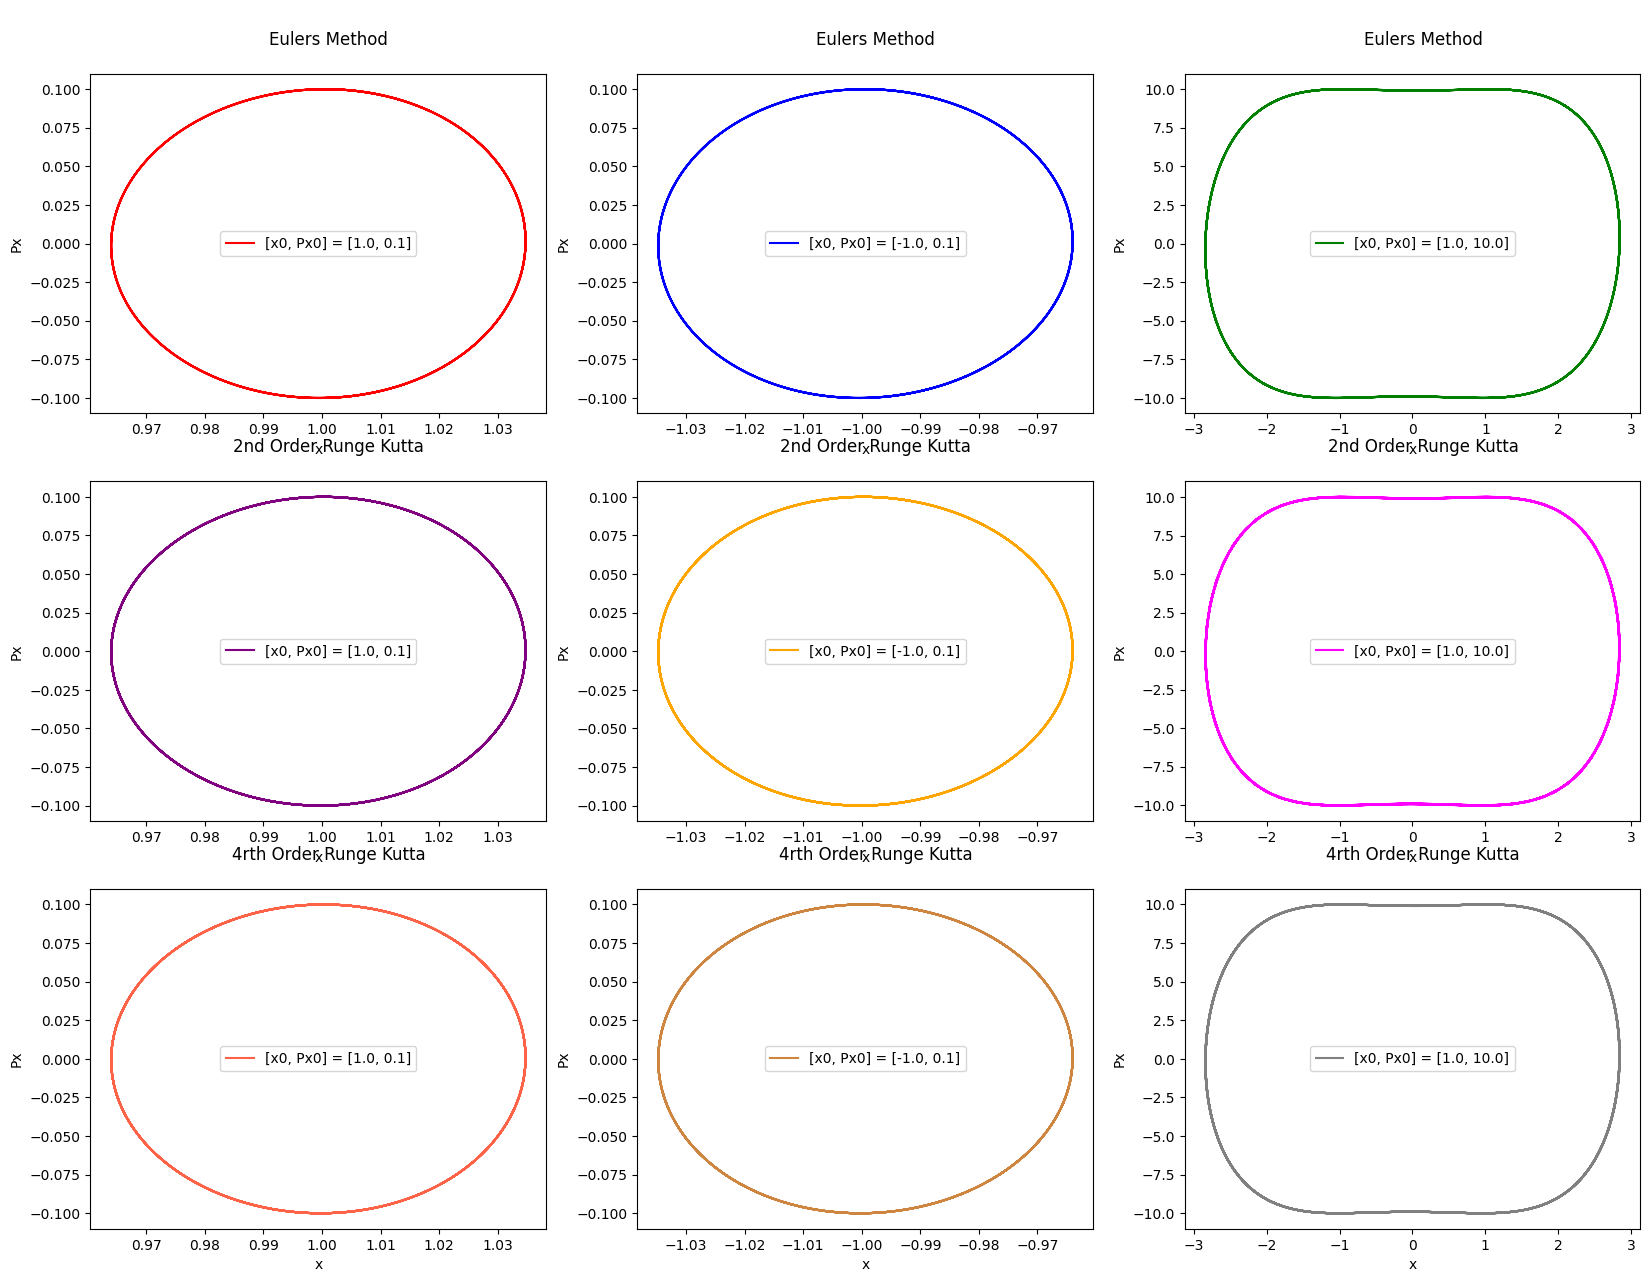

In [1]:

import matplotlib.pyplot as plt
import numpy as np

# Define the potential energy function V(x)
def V(x):
    return (x**2 - 1)**2

# Define the derivative of the potential energy function with respect to x i.e. V'(x)
def V_1(x):
    return 4 * x**3 - 4 * x

# Defining a funciton that uses Euler's Method to calculate the trajectory
def Eulers_Method(x0, Px0, dt, steps):
    """
    Eulers Method
    """
    x_values = [] # Storing the x values given by funciton
    Px_values = [] # Storing the Px values given by function

    x = x0
    Px = Px0

    for i in range(steps): # Re-running the loop for the given number of steps
        x_values.append(x)
        Px_values.append(Px)
        # Update the momentum (px) using the negative gradient of the potential energy
        Px -= dt * V_1(x)

        # Update the position (x) using the updated momentum
        x += dt * Px

    return x_values, Px_values


# 2nd Order Runge Kutta
# Defining a funciton that uses Euler's Method to calculate the trajectory
def Runge_Kutta_2nd(x0, Px0, dt, steps):
    """
    2nd Order Runge Kutta
    """
    x_values = [] # Storing the x values given by funciton
    Px_values = [] # Storing the Px values given by function

    x = x0
    Px = Px0

    for i in range(steps): # Re-running the loop for the given number of steps
        x_values.append(x)
        Px_values.append(Px)
        # Update the momentum (px) using the negative gradient of the potential energy
        Px -= dt * V_1(x)

        # Update the position (x) using the updated momentum
        x += dt * Px
        

        # RK2 step 1: Estimate k1 for both x and px
        k1_x = dt * Px
        k1_px =-dt * V_1(x)

        # RK2 step 2: Estimate k2 for both x and px
        k2_x = dt * (Px + 0.5 * k1_px)
        k2_px = - dt * V_1(x + 0.5 * k1_x)

        # Update x and px using the weighted average of k1 and k2
        x = x + k2_x
        Px = Px + k2_px

    return x_values, Px_values


# Defining a funciton that uses Euler's Method to calculate the trajectory
def Range_Kutta_4rth(x0, Px0, dt, steps):
    """
    4rth Order Runge Kutta
    """
    x_values = [] # Storing the x values given by funciton
    Px_values = [] # Storing the Px values given by function

    x = x0
    Px = Px0

    for i in range(steps): # Re-running the loop for the given number of steps
        x_values.append(x)
        Px_values.append(Px)
        # Update the momentum (px) using the negative gradient of the potential energy
        Px -= dt * V_1(x)

        # Update the position (x) using the updated momentum
        x += dt * Px
        
        # RK4 step 1: Calculate k1 for x and Px
        k1_x = dt * Px
        k1_Px = -dt * V_1(x)

        # RK4 step 2: Calculate k2 for x and Px
        k2_x = dt * (Px + 0.5 * k1_Px)
        k2_Px = -dt * V_1(x + 0.5 * k1_x)

        # RK4 step 3: Calculate k3 for x and Px
        k3_x = dt * (Px + 0.5 * k2_Px)
        k3_Px = -dt * V_1(x + 0.5 * k2_x)

        # RK4 step 4: Calculate k4 for x and Px
        k4_x = dt * (Px + k3_Px)
        k4_Px = -dt * V_1(x + k3_x)

        # Update x and Px using weigdtted averages of k1, k2, k3, and k4
        x += (k1_x + 2 * k2_x + 2 * k3_x + k4_x) / 6
        Px += (k1_Px + 2 * k2_Px + 2 * k3_Px + k4_Px) / 6

    return x_values, Px_values
dt = 0.01  # Time interval
steps = 1000  # Number of steps

# Finding the values of position and momentum for different initial conditions
# And plotting them using matplotlib

#initial_conditions 
ic = [[1.0, 0.1],
      [-1.0, 0.1],
      [1.0, 10.0]]
colors = [['red','blue','green'],
         ['purple','orange','magenta'],
         ['tomato','peru','gray']]
fig, axes = plt.subplots(3,3, figsize=(20,15))

functions = [Eulers_Method, Runge_Kutta_2nd,Range_Kutta_4rth]
for func in functions:
    for i in ic:
        x_, Px_ = func(i[0],i[1], dt, steps)
        axes[functions.index(func),ic.index(i)].plot(x_, Px_, label=f"[x0, Px0] = {i}", color=colors[functions.index(func)][ic.index(i)])
        axes[functions.index(func),ic.index(i)].set_xlabel("x")
        axes[functions.index(func),ic.index(i)].set_ylabel("Px")
        axes[functions.index(func),ic.index(i)].legend()
        axes[functions.index(func),ic.index(i)].set_title(f"{func.__doc__}")

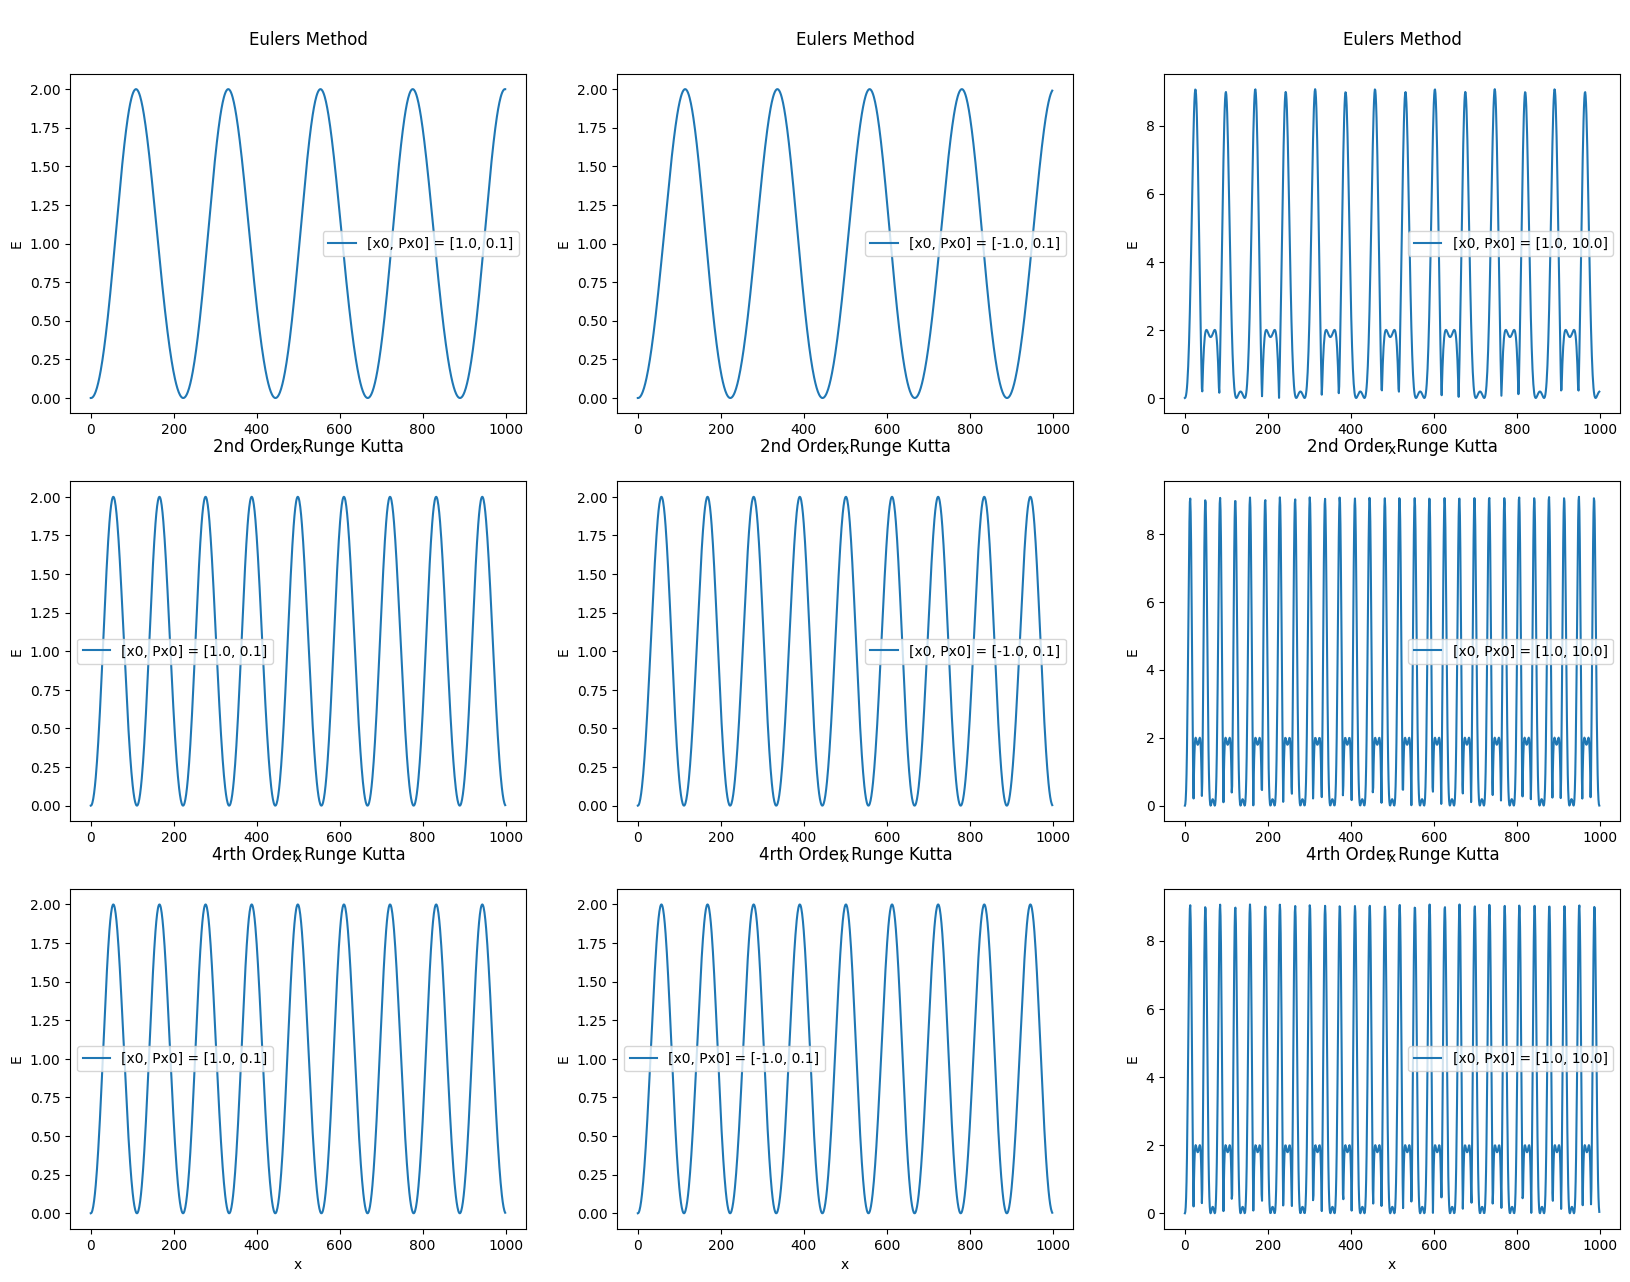

In [2]:
# Conservation of Energy
dt = 0.01
steps = 1000
fig, axes = plt.subplots(3,3, figsize=(20,15))
for func in functions:
    for i in ic:
        x_, Px_ = func(i[0],i[1], dt, steps)
        E = 0.5*(np.array(Px_))+V(np.array(x_))
        E0 = 0.5*(i[1])+V(i[0])
        relative_error = abs((E-E0)/E0)
        axes[functions.index(func),ic.index(i)].plot(relative_error, label=f"[x0, Px0] = {i}")
        axes[functions.index(func),ic.index(i)].set_xlabel("x")
        axes[functions.index(func),ic.index(i)].set_ylabel("E")
        axes[functions.index(func),ic.index(i)].legend()
        axes[functions.index(func),ic.index(i)].set_title(f"{func.__doc__}")

# Problem 2

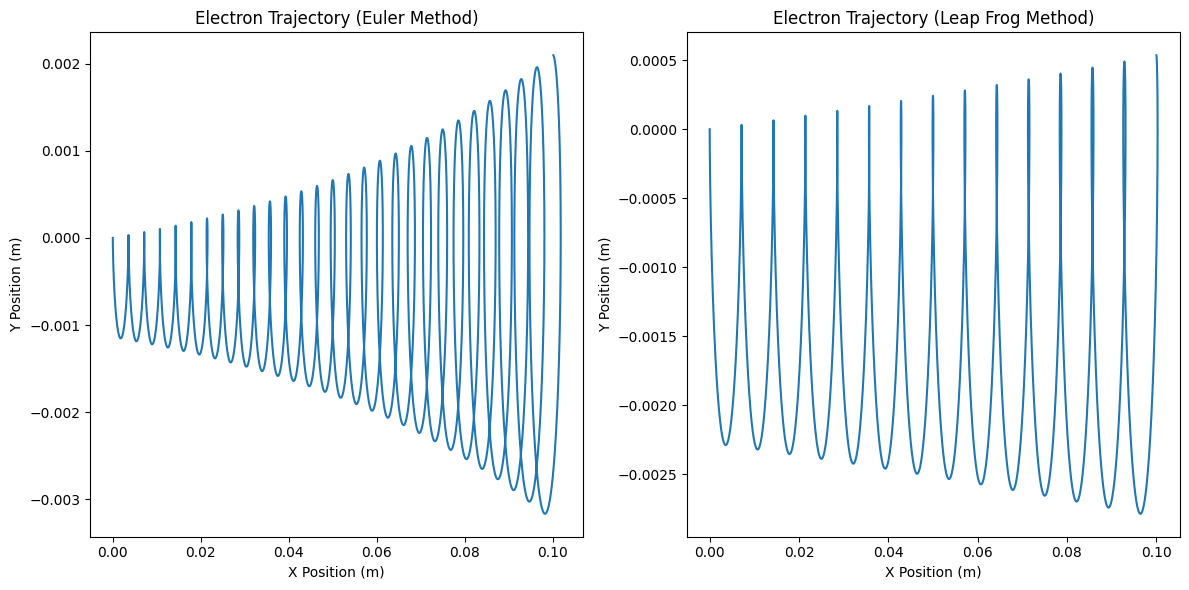

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = -1.602e-19  # Electron charge (Coulombs)
m = 9.109e-31  # Electron mass (kg)

# Initial conditions
initial_position = np.array([0.0, 0.0, 0.0])  # Starting at the origin
initial_velocity = np.array([1.0, 1.0, 1.0])  # Initial velocity (m/s)

# Time parameters
dt = 1e-9  # Time step (s)
num_steps = 10000  # Number of time steps
time = np.arange(0, num_steps * dt, dt)

# Field configurations
def electric_field(x, t):
    # Uniform electric field along the Y-axis
    return np.array([0.0, 1.0, 0.0])

def magnetic_field(x, t):
    # Uniform magnetic field along the Z-axis
    return np.array([0.0, 0.0, 1e-4])

# Initialize arrays to store trajectory data
positions_euler = np.zeros((num_steps, 3))
velocities_euler = np.zeros((num_steps, 3))

positions_leapfrog = np.zeros((num_steps, 3))
velocities_leapfrog = np.zeros((num_steps, 3))

# Euler method simulation
position = initial_position.copy()
velocity = initial_velocity.copy()

for i in range(num_steps):
    force = q * (electric_field(position, time[i]) + np.cross(velocity, magnetic_field(position, time[i])))
    acceleration = force / m
    velocity += acceleration * dt
    position += velocity * dt

    positions_euler[i] = position
    velocities_euler[i] = velocity

# Leap Frog method simulation
position = initial_position.copy()
velocity = initial_velocity.copy()

for i in range(num_steps):
    force = q * (electric_field(position, time[i]) + np.cross(velocity, magnetic_field(position, time[i])))
    acceleration = force / m
    velocity += 0.5 * acceleration * dt
    position += velocity * dt

    positions_leapfrog[i] = position
    velocities_leapfrog[i] = velocity

# Plot trajectories
plt.figure(figsize=(12, 6))

# Euler method
plt.subplot(1, 2, 1)
plt.title('Electron Trajectory (Euler Method)')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.plot(positions_euler[:, 0], positions_euler[:, 1])

# Leap Frog method
plt.subplot(1, 2, 2)
plt.title('Electron Trajectory (Leap Frog Method)')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.plot(positions_leapfrog[:, 0], positions_leapfrog[:, 1])

plt.tight_layout()
plt.show()

# Problem 3

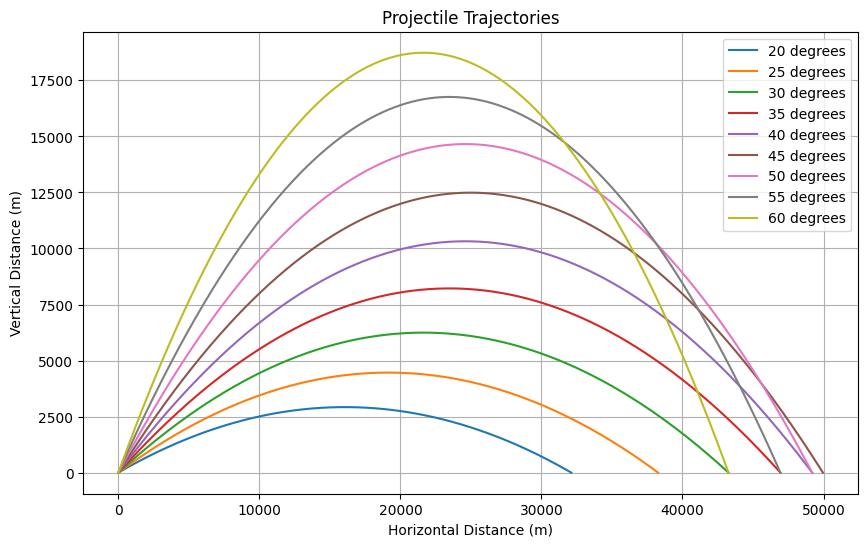

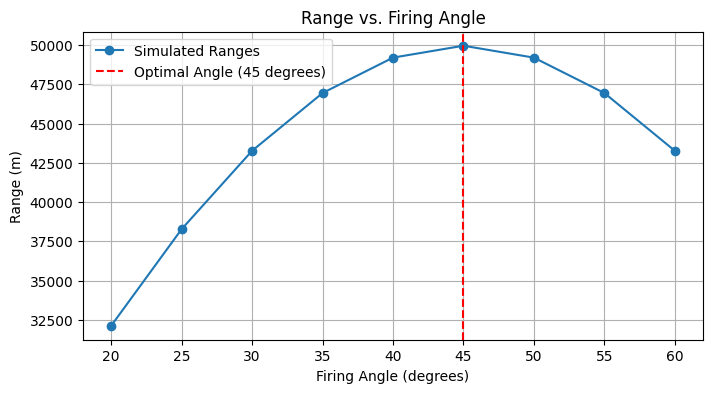

Optimal Range: 49957.80 meters
Optimal Angle: 45.00 degrees


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
initial_speed = 700.0  # Initial speed of the projectile (m/s)
angles_deg = np.arange(20, 65, 5)  # Firing angles in degrees

# Convert angles to radians
angles_rad = np.deg2rad(angles_deg)

# Time step and total time
dt = 0.01  # Time step (s)

# Initialize arrays to store trajectory data
x_trajectories = []
y_trajectories = []
ranges = []

# Perform simulations for different firing angles
for angle_rad in angles_rad:
    # Initialize variables
    x = [0.0]
    y = [0.0]
    vx = initial_speed * np.cos(angle_rad)
    vy = initial_speed * np.sin(angle_rad)
    time = [0.0]

    while y[-1] >= 0:
        # Euler method for x and y components
        x_new = x[-1] + vx * dt
        y_new = y[-1] + vy * dt

        # Update velocities
        vx = vx
        vy = vy - g * dt

        # Append new positions and time
        x.append(x_new)
        y.append(y_new)
        time.append(time[-1] + dt)

    # Store trajectory data
    x_trajectories.append(x)
    y_trajectories.append(y)
    ranges.append(x[-1])

# Find the index of the maximum range
optimal_index = np.argmax(ranges)
optimal_angle_deg = angles_deg[optimal_index]
optimal_range = ranges[optimal_index]

# Plot trajectories
plt.figure(figsize=(10, 6))
for i, angle_deg in enumerate(angles_deg):
    plt.plot(x_trajectories[i], y_trajectories[i], label=f'{angle_deg} degrees')

plt.title('Projectile Trajectories')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.legend()
plt.grid(True)

# Calculate and plot ranges
plt.figure(figsize=(8, 4))
plt.plot(angles_deg, ranges, marker='o', label='Simulated Ranges')
plt.title('Range vs. Firing Angle')
plt.xlabel('Firing Angle (degrees)')
plt.ylabel('Range (m)')
plt.axvline(x=optimal_angle_deg, color='r', linestyle='--', label=f'Optimal Angle ({optimal_angle_deg} degrees)')
plt.legend()
plt.grid(True)
plt.show()

# Display optimal range and angle
print(f"Optimal Range: {optimal_range:.2f} meters")
print(f"Optimal Angle: {optimal_angle_deg:.2f} degrees")

# Problem 4

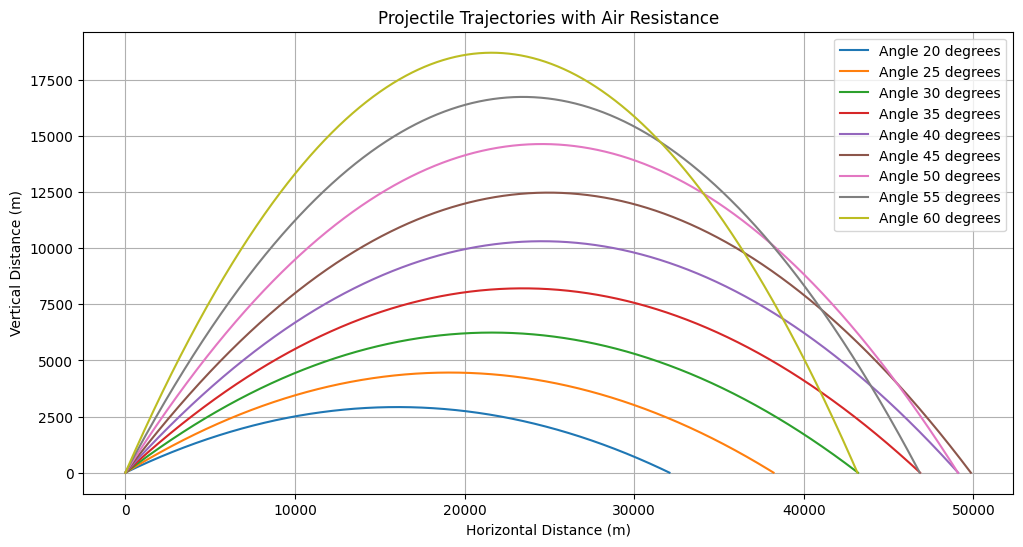

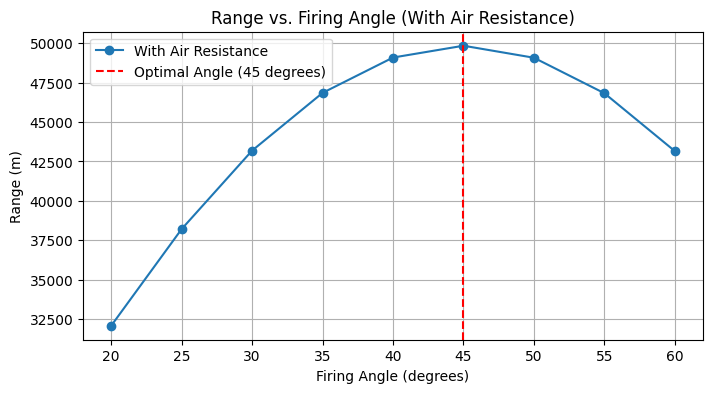

Optimal Angle (with air resistance): 45 degrees
Optimal Range (with air resistance): 49846.52677521967 meters


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
initial_speed = 700.0  # Initial speed of the projectile (m/s)
angles_deg = np.arange(20, 65, 5)  # Firing angles in degrees
b_over_m = 4e-5  # Air resistance coefficient (1/m)

# Convert angles to radians
angles_rad = np.deg2rad(angles_deg)

# Time step and total time
dt = 0.01  # Time step (s)
total_time = 2 * initial_speed * np.sin(angles_rad) / g  # Maximum flight time

# Initialize arrays to store trajectory data
x_trajectories_with_air_resistance = []
y_trajectories_with_air_resistance = []
ranges_with_air_resistance = []

# Perform simulations for different firing angles with air resistance
for angle_rad in angles_rad:
    # Initialize variables
    x = [0.0]
    y = [0.0]
    vx = initial_speed * np.cos(angle_rad)
    vy = initial_speed * np.sin(angle_rad)
    time = [0.0]

    while y[-1] >= 0:
        # Calculate air drag forces
        v = np.sqrt(vx**2 + vy**2)
        F_drag_x = -b_over_m * v * vx
        F_drag_y = -b_over_m * v * vy

        # Euler method for x and y components with air resistance
        ax = F_drag_x / initial_speed  # Divide by initial_speed to account for b/m
        ay = (-g + F_drag_y / initial_speed)  # Divide by initial_speed to account for b/m

        x_new = x[-1] + vx * dt
        y_new = y[-1] + vy * dt
        vx_new = vx + ax * dt
        vy_new = vy + ay * dt

        # Update variables
        x.append(x_new)
        y.append(y_new)
        vx = vx_new
        vy = vy_new
        time.append(time[-1] + dt)

    # Store trajectory data with air resistance
    x_trajectories_with_air_resistance.append(x)
    y_trajectories_with_air_resistance.append(y)
    ranges_with_air_resistance.append(x[-1])

# Plot trajectories for every firing angle with air resistance
plt.figure(figsize=(12, 6))
for i in range(len(angles_deg)):
    plt.plot(
        x_trajectories_with_air_resistance[i],
        y_trajectories_with_air_resistance[i],
        label=f'Angle {angles_deg[i]} degrees'
    )

plt.title('Projectile Trajectories with Air Resistance')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.legend()
plt.grid(True)

# Plot ranges for different firing angles with air resistance
plt.figure(figsize=(8, 4))
plt.plot(angles_deg, ranges_with_air_resistance, marker='o', label='With Air Resistance')
plt.title('Range vs. Firing Angle (With Air Resistance)')
plt.xlabel('Firing Angle (degrees)')
plt.ylabel('Range (m)')
plt.grid(True)

# Find numerically the firing angle that corresponds to the maximum range
optimal_angle_index = np.argmax(ranges_with_air_resistance)
optimal_angle_deg_with_air_resistance = angles_deg[optimal_angle_index]
optimal_range_with_air_resistance = ranges_with_air_resistance[optimal_angle_index]
plt.axvline(x=optimal_angle_deg_with_air_resistance, color='r', linestyle='--',
            label=f'Optimal Angle ({optimal_angle_deg_with_air_resistance} degrees)')

plt.legend()
plt.show()

print(f"Optimal Angle (with air resistance): {optimal_angle_deg_with_air_resistance} degrees")
print(f"Optimal Range (with air resistance): {optimal_range_with_air_resistance} meters")

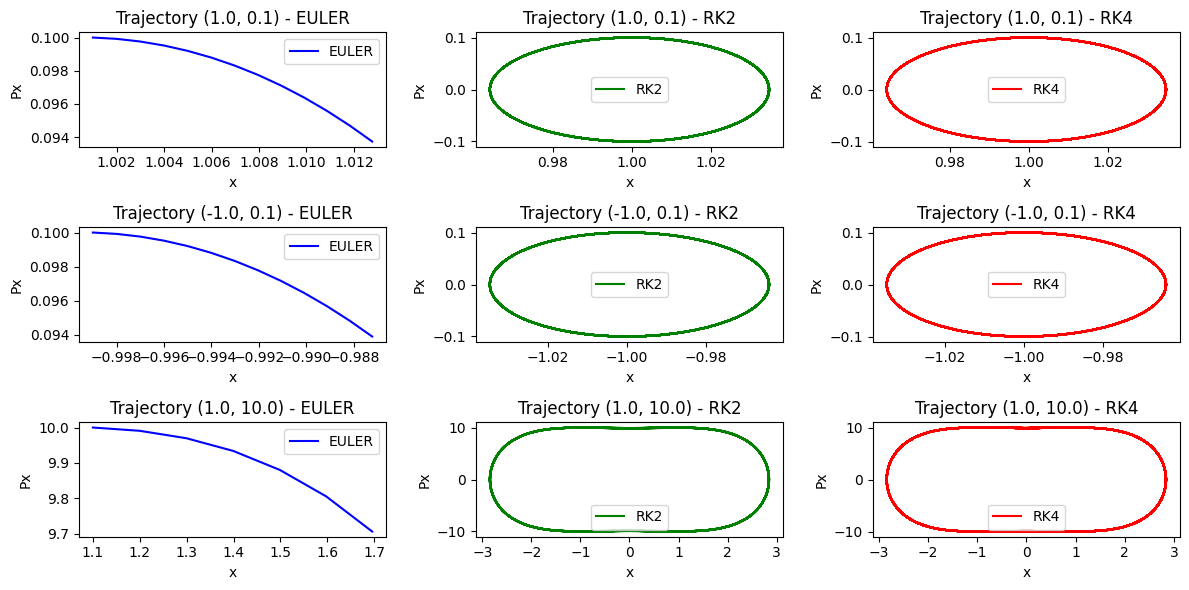

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the potential energy function V(x)
def potential_energy(x):
    return (x**2 - 1)**2

# Define the force function based on the potential energy
def force(x):
    return -4 * x * (x**2 - 1)

# Function for Euler's Method
def euler_method(x, px, dt):
    x_new = x + px * dt
    px_new = px + force(x) * dt
    return x_new, px_new

# Function for 2nd Order Runge-Kutta Method
def runge_kutta_2nd_order(x, px, dt):
    k1x = px
    k1px = force(x)
    k2x = px + k1px * dt
    k2px = force(x + k1x * dt)
    x_new = x + 0.5 * (k1x + k2x) * dt
    px_new = px + 0.5 * (k1px + k2px) * dt
    return x_new, px_new

# Function for 4th Order Runge-Kutta Method
def runge_kutta_4th_order(x, px, dt):
    k1x = px
    k1px = force(x)
    k2x = px + 0.5 * k1px * dt
    k2px = force(x + 0.5 * k1x * dt)
    k3x = px + 0.5 * k2px * dt
    k3px = force(x + 0.5 * k2x * dt)
    k4x = px + k3px * dt
    k4px = force(x + k3x * dt)
    x_new = x + (k1x + 2 * k2x + 2 * k3x + k4x) * (dt / 6)
    px_new = px + (k1px + 2 * k2px + 2 * k3px + k4px) * (dt / 6)
    return x_new, px_new

# Function to simulate and check energy conservation
def simulate(x0, px0, dt, num_steps, method):
    x = x0
    px = px0
    trajectory = []
    energy_initial = 0.5 * px**2 + potential_energy(x)

    for _ in range(num_steps):
        if method == 'euler':
            x, px = euler_method(x, px, dt)
        elif method == 'rk2':
            x, px = runge_kutta_2nd_order(x, px, dt)
        elif method == 'rk4':
            x, px = runge_kutta_4th_order(x, px, dt)
        else:
            raise ValueError("Invalid method specified.")

        trajectory.append((x, px))
        
        # Check energy conservation
        energy_current = 0.5 * px**2 + potential_energy(x)
        if abs((energy_current - energy_initial) / energy_initial) > 0.01:
            break

    return trajectory

# Initial conditions (x, Px)
initial_conditions = [(1.0, 0.1), (-1.0, 0.1), (1.0, 10.0)]

# Simulation parameters
dt = 0.01
num_steps = 10000

# Plot the trajectories
plt.figure(figsize=(12, 6))
methods = ['euler', 'rk2', 'rk4']
colors = ['b', 'g', 'r']

for i, (x0, px0) in enumerate(initial_conditions):
    for j, method in enumerate(methods):
        plt.subplot(3, 3, i * 3 + j + 1)
        plt.title(f'Trajectory ({x0}, {px0}) - {method.upper()}')
        plt.xlabel('x')
        plt.ylabel('Px')
        trajectory = simulate(x0, px0, dt, num_steps, method)
        x_values, px_values = zip(*trajectory)
        plt.plot(x_values, px_values, color=colors[j], label=method.upper())
        plt.legend()

plt.tight_layout()
plt.show()

The End